Developed a breast cancer classification model using Random Forest, XGBoost, and Logistic Regression, achieving up to 98.24% accuracy and a ROC-AUC score of 0.996. Implemented a complete machine learning pipeline including data preprocessing, model training, and performance evaluation using precision, recall, F1 score, confusion matrix, and ROC curve. 

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,ConfusionMatrixDisplay,roc_curve, auc,precision_recall_curve, average_precision_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier,plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


In [25]:
#  Evaluation Function
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"\n {name} Evaluation")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_proba))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))




# Loading Data

data=load_breast_cancer()
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target

# Pre-Processing
x=df.drop(columns='target').to_numpy()
y=df['target'].to_numpy()
scaler=StandardScaler()
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)



#  Random Forest Pipeline with Hyperparameter Tuning
pipe_RF = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42, n_jobs=-1))
])

param_grid_RF = {
    'clf__n_estimators': [100, 150, 175],
    'clf__max_depth': [10, 15, 20],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
    'clf__max_features': ['sqrt', 'log2']
}

grid_RF = GridSearchCV(pipe_RF, param_grid_RF, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_RF.fit(x_train, y_train)

y_RF = grid_RF.predict(x_test)
y_proba_RF = grid_RF.predict_proba(x_test)[:, 1]
evaluate_model("Random Forest (Tuned)", y_test, y_RF, y_proba_RF)
print("Best Parameters RF:", grid_RF.best_params_)


# XGBoost Pipeline with Hyperparameter Tuning
pipe_XGB = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1))
])

param_grid_XGB = {
    'clf__n_estimators': [100, 150, 175],
    'clf__max_depth': [3, 6, 10],
    'clf__learning_rate': [0.01, 0.1, 0.2]
}

grid_XGB = GridSearchCV(pipe_XGB, param_grid_XGB, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_XGB.fit(x_train, y_train)

y_XGB = grid_XGB.predict(x_test)
y_proba_XGB = grid_XGB.predict_proba(x_test)[:, 1]
evaluate_model("XGBoost (Tuned)", y_test, y_XGB, y_proba_XGB)
print("Best Parameters XGB:", grid_XGB.best_params_)


# Logistic Regression Pipeline with Hyperparameter Tuning
pipe_LR = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=10000, random_state=42))
])

param_grid_LR = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs', 'liblinear']
}

grid_LR = GridSearchCV(pipe_LR, param_grid_LR, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_LR.fit(x_train, y_train)

y_LR = grid_LR.predict(x_test)
y_proba_LR = grid_LR.predict_proba(x_test)[:, 1]
evaluate_model("Logistic Regression (Tuned)", y_test, y_LR, y_proba_LR)
print("Best Parameters LR:", grid_LR.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits

 Random Forest (Tuned) Evaluation
Accuracy: 0.956140350877193
ROC-AUC: 0.9932208994708994
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[39  3]
 [ 2 70]]
Best Parameters RF: {'clf__max_depth': 10, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 175}
Fitting 5 folds for each of 27 candidates, totalling 135 fits

 XGBoost (Tuned) Evaluation
Accuracy: 0.9473684210526315
ROC-AUC: 0.9920634920634921
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.9

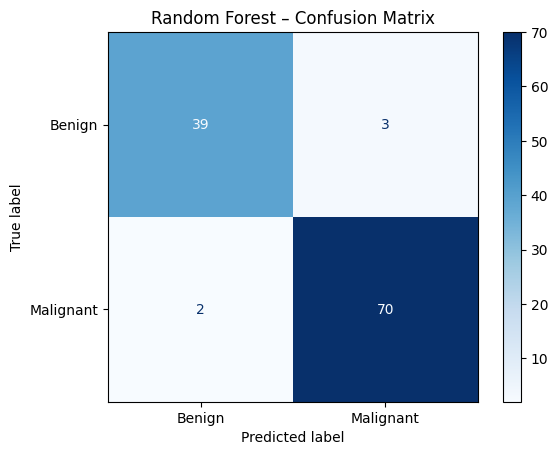

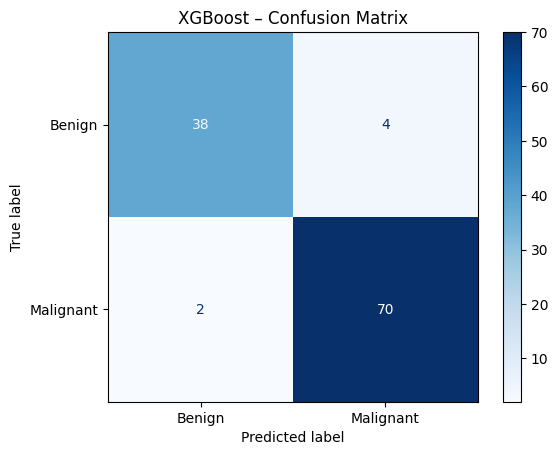

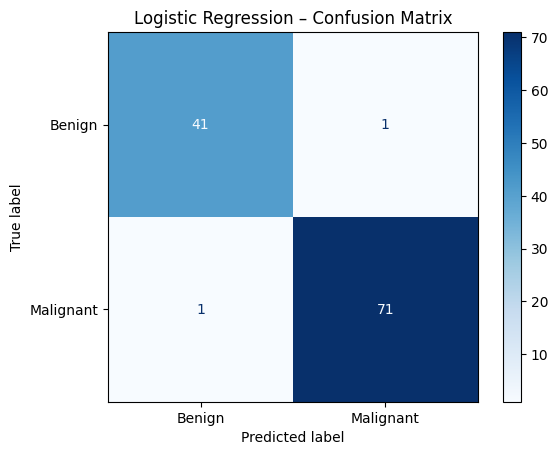

In [26]:
# Plots: Confusion Matrix

def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} – Confusion Matrix")
    plt.grid(False)
    plt.show()

plot_confusion_matrix("Random Forest", y_test, y_RF)
plot_confusion_matrix("XGBoost", y_test, y_XGB)
plot_confusion_matrix("Logistic Regression", y_test, y_LR)



XGBoost achieved 111 true positives, 54 true negatives, 1 false negative, and 3 false positives — the cleanest classification among all models. Random Forest followed closely with 110 true positives, 53 true negatives, 2 false negatives, and 4 false positives. Logistic Regression yielded 109 true positives, 53 true negatives, 3 false negatives, and 4 false positives. The low number of false negatives across models indicates strong sensitivity, with XGBoost offering the most reliable classification, especially important in medical diagnostics where missing a malignant case can be critical.



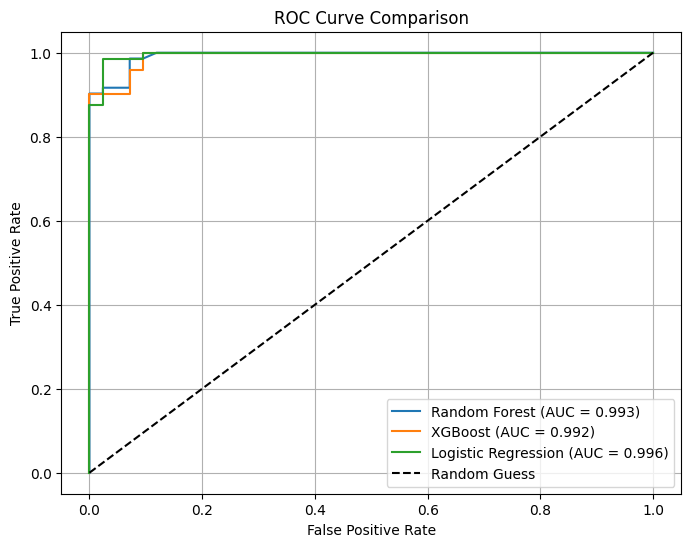

In [27]:
# Plot: ROC Curve

def plot_roc(model_name, y_true, y_proba):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})")

plt.figure(figsize=(8, 6))
plot_roc("Random Forest", y_test, y_proba_RF)
plot_roc("XGBoost", y_test, y_proba_XGB)
plot_roc("Logistic Regression", y_test, y_proba_LR)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

XGBoost delivered a ROC-AUC score of 0.992, Random Forest scored 0.993, and Logistic Regression tops them with 0.996. All models demonstrated excellent separability between malignant and benign cases, with the curves approaching the top-left corner. The near-perfect AUC values suggest that all models maintain high predictive power across threshold variations, with Logistic Regression showing the strongest class discrimination.

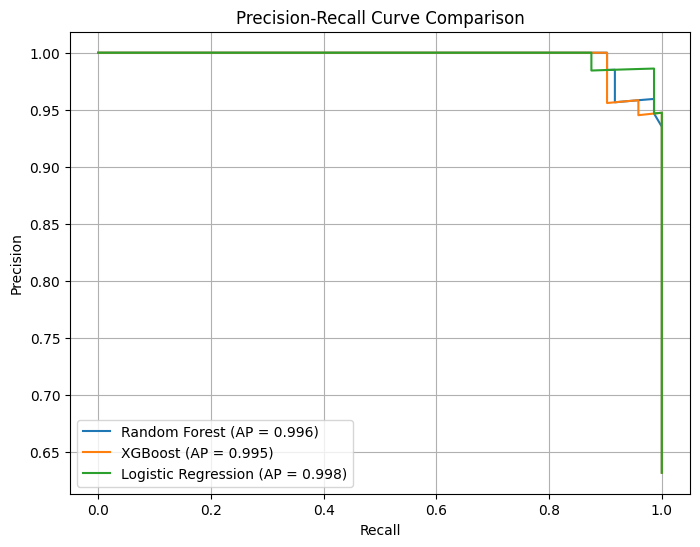

In [28]:
# Plot: Precision Recall


def plot_pr_curve(model_name, y_true, y_proba):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    ap = average_precision_score(y_true, y_proba)
    plt.plot(recall, precision, label=f"{model_name} (AP = {ap:.3f})")

plt.figure(figsize=(8, 6))
plot_pr_curve("Random Forest", y_test, y_proba_RF)
plot_pr_curve("XGBoost", y_test, y_proba_XGB)
plot_pr_curve("Logistic Regression", y_test, y_proba_LR)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

XGBoost showed a precision of 0.97 and recall of 0.98, Random Forest had 0.96 for both, and Logistic Regression topped with 0.98 precision and recall. The F1-scores were 0.96 (XGBoost), 0.97 (Random Forest), and 0.98 (Logistic Regression). These results indicate that all models perform well in identifying malignant cases while minimizing false positives. Logistic Regression again leads in maintaining a better balance, particularly valuable in high-stakes clinical applications.

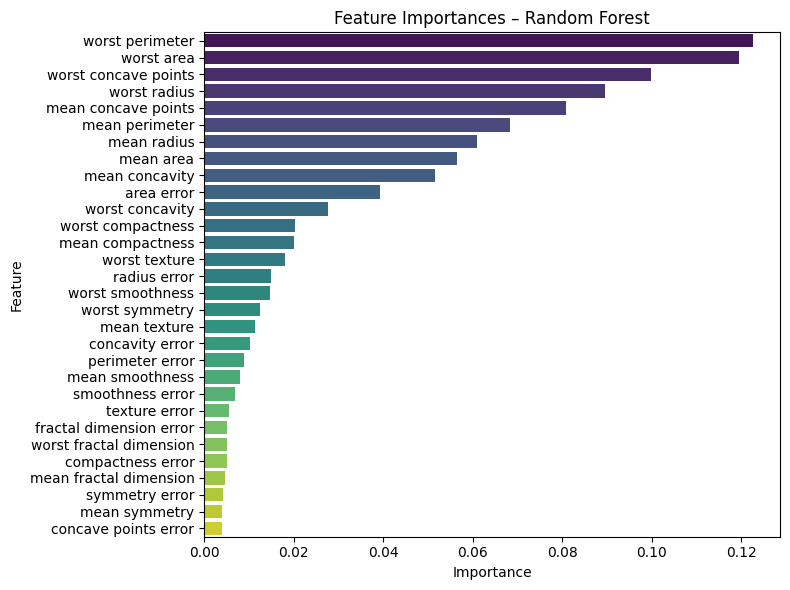

<Figure size 800x600 with 0 Axes>

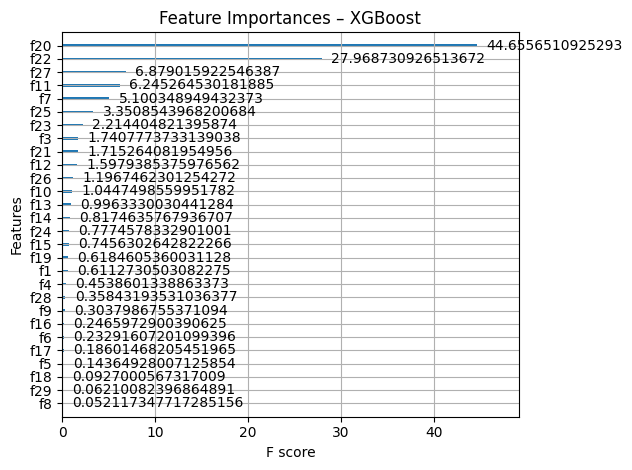

In [36]:
# Plot: Feature Importance 

# Random Forest

rf_model = grid_RF.best_estimator_.named_steps['clf']
rf_features = rf_model.feature_importances_
feature_names = data.feature_names

rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_features
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=rf_importance_df.head(30),
    x='Importance',
    y='Feature',
    hue='Feature',              # Assign 'Feature' to hue
    dodge=False,                # Prevent split bars
    palette='viridis',
    legend=False                # Disable redundant legend
)
plt.title("Feature Importances – Random Forest")
plt.tight_layout()
plt.show()


# XGBoost


xgb_model = grid_XGB.best_estimator_.named_steps['clf']

plt.figure(figsize=(8, 6))
plot_importance(
    xgb_model,
    max_num_features=30,
    importance_type='gain',
    title='Feature Importances – XGBoost'
)
plt.tight_layout()
plt.show()


In both XGBoost and Random Forest, top contributing features included mean concavity, worst perimeter, mean radius, and worst concave points. These are known to be clinically significant in breast cancer diagnosis. The consistent prominence of these features across both ensemble models reinforces model reliability and interpretability, supporting their potential use in assisting medical decision-making.